In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
npy_list = [
    # '/work/sc004/sc004/tc1213/astrodet/output/50/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/400/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/1000/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/2000/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/4000/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/6000/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/10000_2/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/15000/results.npy',
    '/work/sc004/sc004/tc1213/astrodet/output/20000/results.npy',
]

ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

APs = {'star': {}, 'galaxy': {}}

for cls in cls_names:
    APs[cls] = {}
    for npy in npy_list:
        tmp = npy.split('/')[-2]
        if '_' in tmp:
            tmp = tmp.split('_')[0]
        tmp = str(int(np.floor(int(tmp)*128/1000)))
        APs[cls][tmp] = []
    
for npy in npy_list:
    tmp = npy.split('/')[-2]
    if '_' in tmp:
        tmp = tmp.split('_')[0]
    tmp = str(int(np.floor(int(tmp)*128/1000)))

    results = np.load(npy, allow_pickle=True).item()

    results_per_category = results[ap_type]['results_per_category']

    # fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # axs = axs.flatten()

    # ious = np.linspace(0.50,0.95,10)
    # colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

    # Plot precision recall
    for j, precision_class in enumerate(results_per_category):
        precision_shape = np.shape(precision_class)
        # plt.figure()
        for i in range(precision_shape[0]):
            # precision has dims (iou, recall, cls, area range, max dets)
            # area range index 0: all area ranges
            # max dets index -1: typically 100 per image
            p_dat = precision_class[i, :, j, 0, -1]
            # Hide vanishing precisions
            mask = (p_dat > 0)
            # Only keep first occurance of 0 value in array
            mask[np.cumsum(~mask) == 1] = True
            p = p_dat[mask]
            # Recall points
            r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
            dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
            # Plot
            # iou = np.around(ious[i], 2)
            AP = 100*np.sum(p*dr)
    
            APs[cls_names[j]][tmp].append(AP)

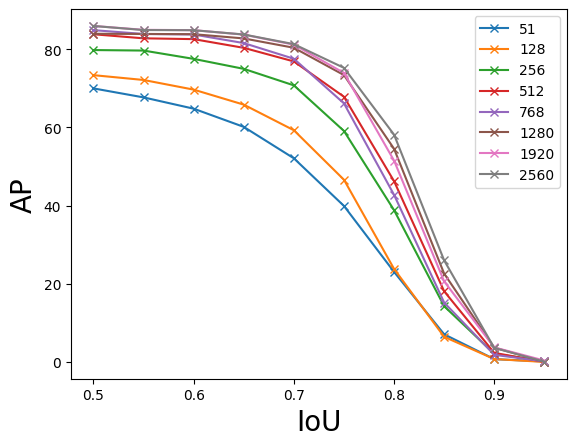

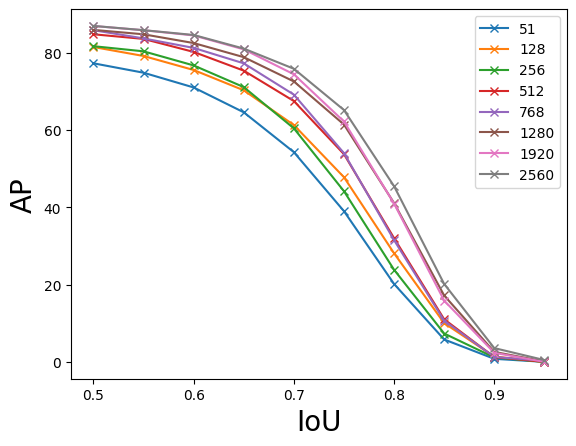

In [11]:
for cls in cls_names:
    df = pd.DataFrame(APs[cls])
    ious = np.linspace(0.50,0.95,10)
    plt.figure()
    for epochs in df.columns:
        plt.plot(ious, df[epochs], label=epochs, marker='x')
    plt.xlabel('IoU', fontsize=20)
    plt.ylabel('AP', fontsize=20)
    plt.legend()

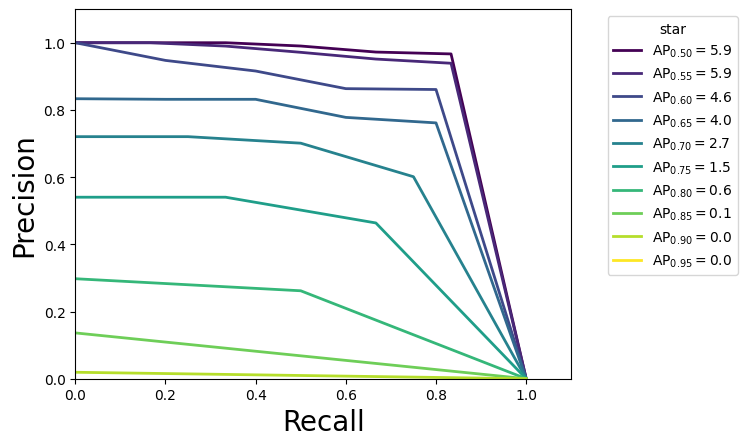

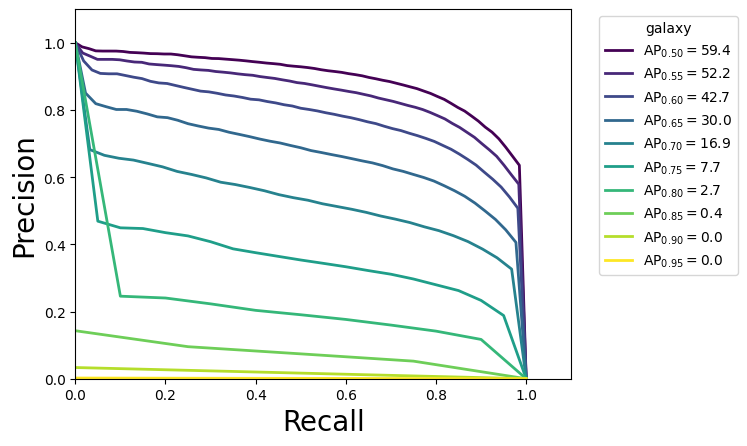

In [4]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/50/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

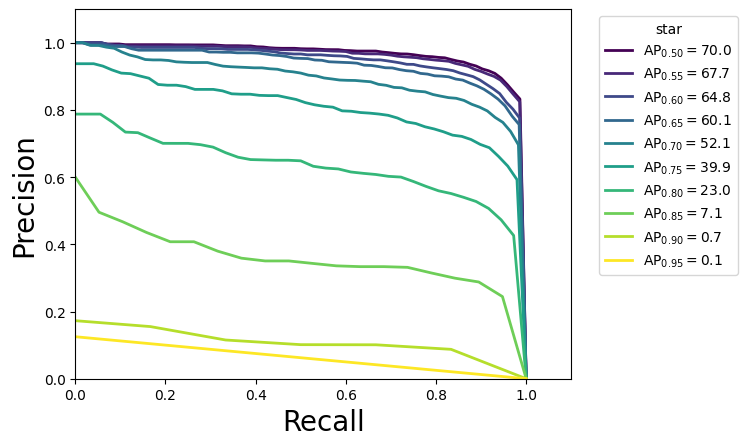

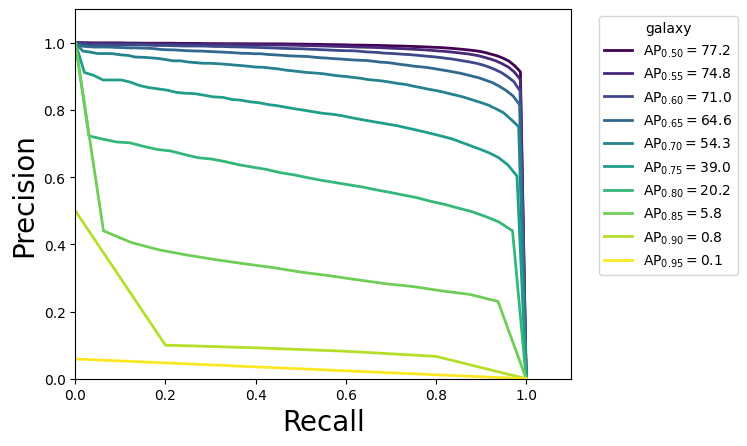

In [15]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/400/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

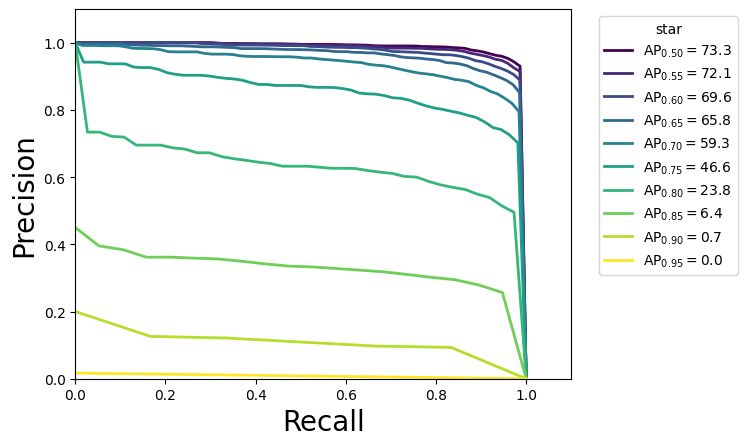

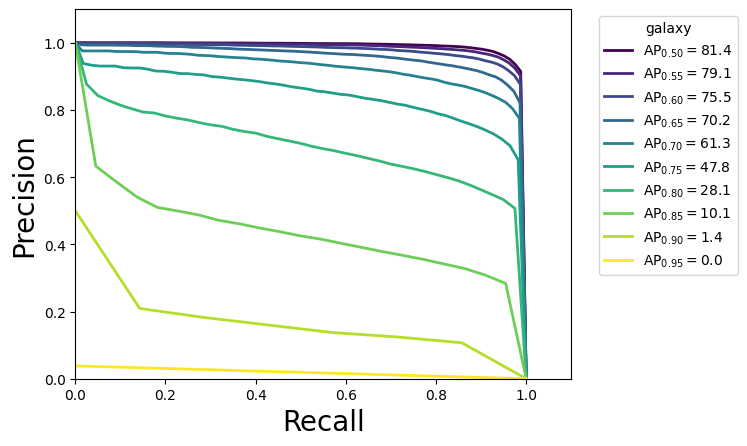

In [16]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/1000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

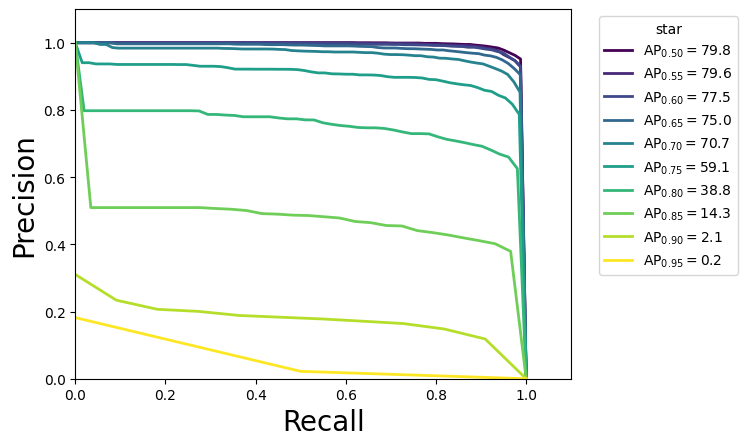

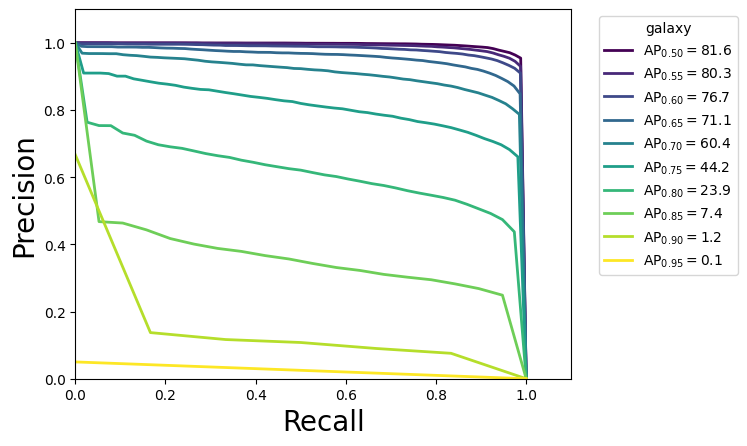

In [17]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/2000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

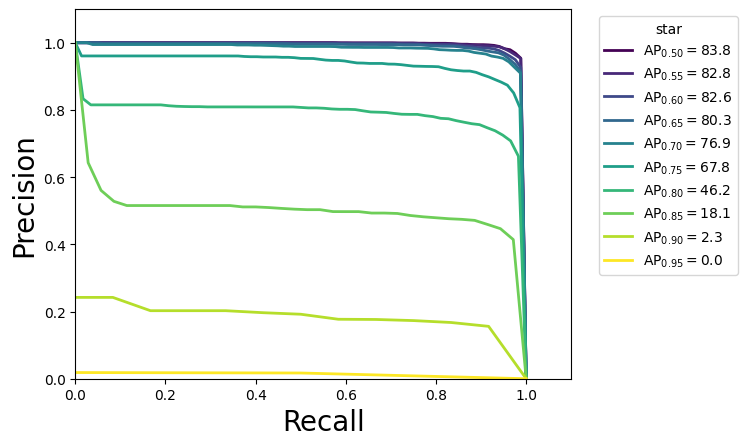

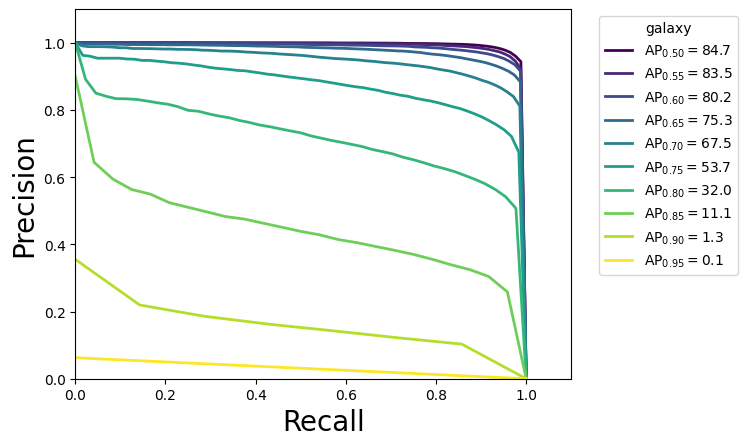

In [18]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/4000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

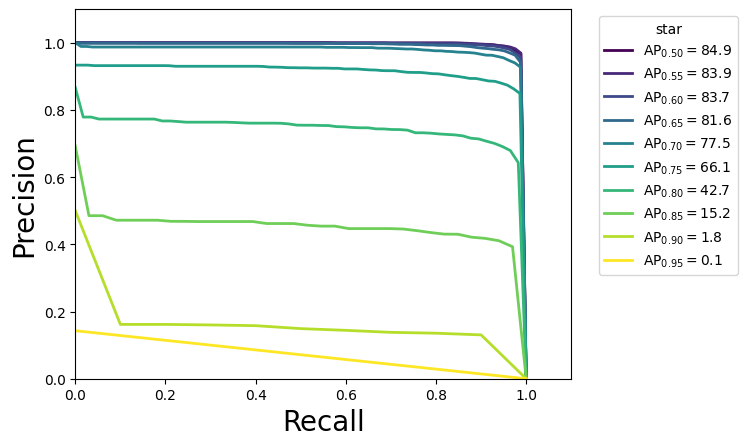

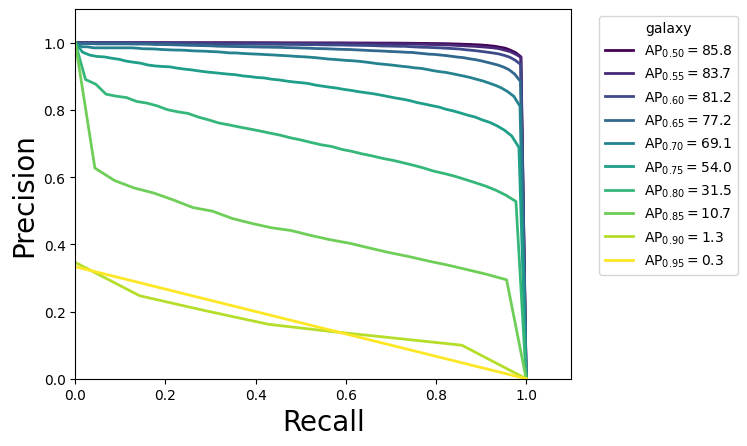

In [19]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/6000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

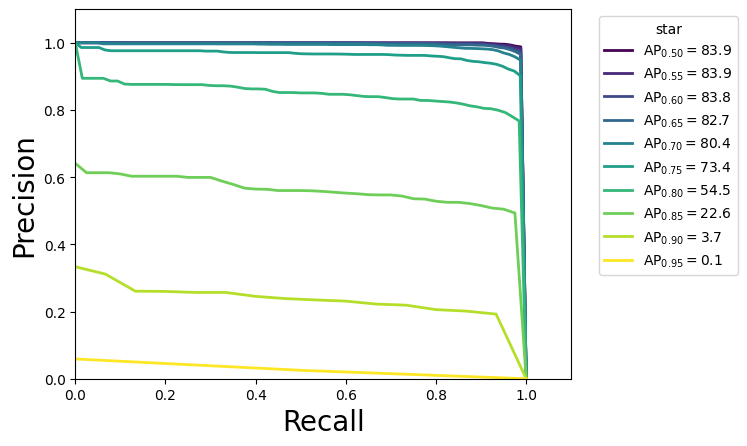

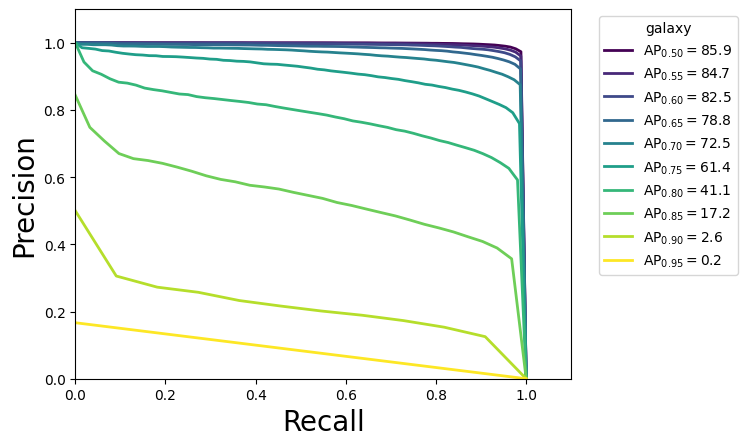

In [2]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/10000_2/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

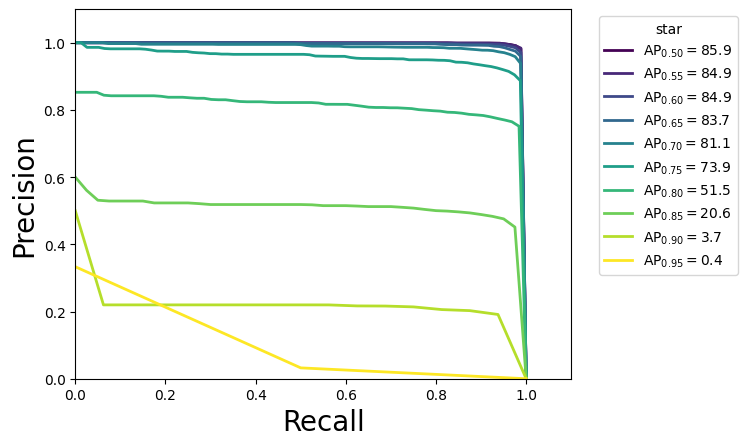

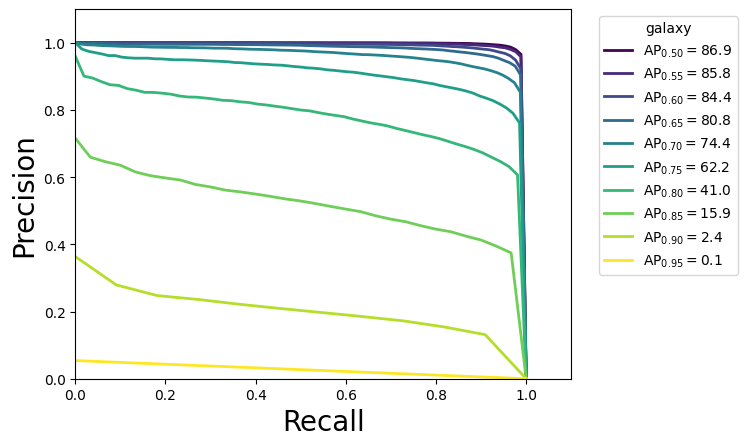

In [3]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/15000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))

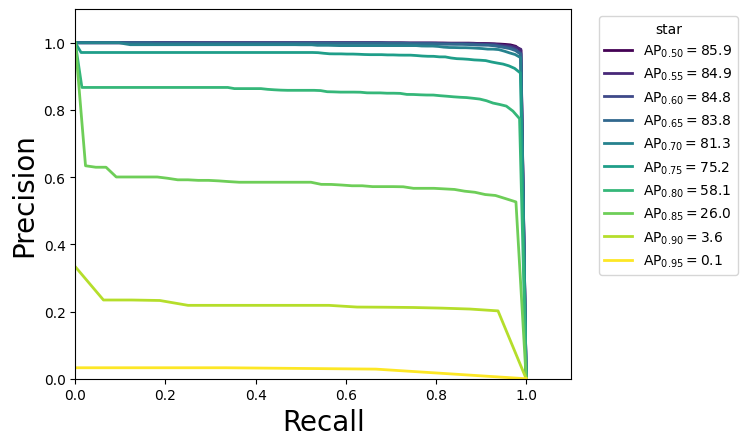

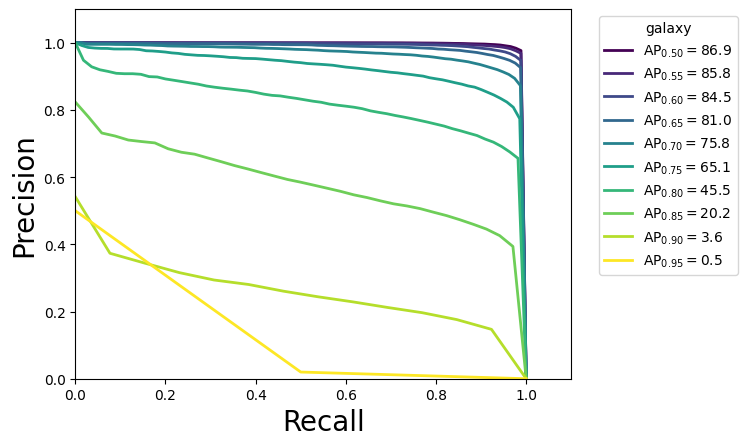

In [26]:
results = np.load('/work/sc004/sc004/tc1213/astrodet/output/20000/results.npy', allow_pickle=True).item()
ap_type = 'bbox' # Which type of precision/recall to use? 'segm', or 'bbox'
cls_names = ['star', 'galaxy']

results_per_category = results[ap_type]['results_per_category']

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# axs = axs.flatten()

ious = np.linspace(0.50,0.95,10)
colors = plt.cm.viridis(np.linspace(0,1,len(ious)))

# Plot precision recall
for j, precision_class in enumerate(results_per_category):
    precision_shape = np.shape(precision_class)
    plt.figure()
    for i in range(precision_shape[0]):
        # precision has dims (iou, recall, cls, area range, max dets)
        # area range index 0: all area ranges
        # max dets index -1: typically 100 per image
        p_dat = precision_class[i, :, j, 0, -1]
        # Hide vanishing precisions
        mask = (p_dat > 0)
        # Only keep first occurance of 0 value in array
        mask[np.cumsum(~mask) == 1] = True
        p = p_dat[mask]
        # Recall points
        r = np.linspace(0, 1, len(p)) # Recall is always defined from 0 to 1 for these plots, I think
        dr = np.diff(np.linspace(0, 1, len(p_dat)))[0] # i think
        # Plot
        iou = np.around(ious[i], 2)
        AP = 100*np.sum(p*dr)
        plt.plot(r, p, label=r'${\rm{AP}}_{%.2f} = %.1f$' % (iou, AP), color=colors[i], lw=2) # use a viridis color scheme
        plt.xlabel('Recall', fontsize=20)
        plt.ylabel('Precision', fontsize=20)
        plt.xlim(0, 1.1)
        plt.ylim(0, 1.1)
        plt.legend(fontsize=10, title=f'{cls_names[j]}', bbox_to_anchor=(1.35, 1.0))